In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.tools import diff
from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.tsa.vector_ar.vecm import coint_johansen
from statsmodels.tsa.vector_ar.vecm import select_coint_rank,select_order
from statsmodels.tsa.vector_ar.vecm import VECM
from statsmodels.tsa.api import VAR
from datetime import datetime
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.stattools import jarque_bera
from statsmodels.graphics.gofplots import qqplot
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tools.eval_measures import rmse
from sklearn.metrics import mean_absolute_error

explicar a existência do icms_m2


In [ ]:
icms = pd.read_excel('/content/drive/MyDrive/Gerência de Estudos e Projeções/Dados/VARVEC/icms.xlsx', index_col='Data')
print(icms.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 185 entries, 2008-01-01 to 2023-05-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ICMS    185 non-null    float64
dtypes: float64(1)
memory usage: 2.9 KB
None


In [ ]:
icms_m2 = pd.read_excel('/content/drive/MyDrive/Gerência de Estudos e Projeções/Dados/VARVEC/icms.xlsx', index_col='Data')
print(icms_m2.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 185 entries, 2008-01-01 to 2023-05-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ICMS    185 non-null    float64
dtypes: float64(1)
memory usage: 2.9 KB
None


In [ ]:
igpm = pd.read_excel('/content/drive/MyDrive/Gerência de Estudos e Projeções/Dados/VARVEC/IGP-M (mensal).xlsx', index_col='Data')
print(igpm.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 185 entries, 2008-01-01 to 2023-05-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   IGP     185 non-null    float64
dtypes: float64(1)
memory usage: 2.9 KB
None


In [ ]:
ipc = pd.read_excel('/content/drive/MyDrive/Gerência de Estudos e Projeções/Dados/VARVEC/IPC - BR (mensal).xlsx', index_col ='Data')
ipc = ipc.apply(lambda x: x.replace(',','.'))
print(ipc.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 185 entries, 2008-01-01 to 2023-05-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   IPC     185 non-null    float64
dtypes: float64(1)
memory usage: 2.9 KB
None


In [ ]:
# Saldo de empregados de Alagoas

saldo_emprego = pd.read_excel('/content/drive/MyDrive/Gerência de Estudos e Projeções/Dados/VARVEC/Saldo de empregados de Alagoas (mensal).xlsx', index_col='Data')
saldo_emprego = saldo_emprego['Saldo']
saldo_emprego = saldo_emprego.astype(float)
print(saldo_emprego.info())

<class 'pandas.core.series.Series'>
DatetimeIndex: 184 entries, 2008-01-01 to 2023-04-01
Series name: Saldo
Non-Null Count  Dtype  
--------------  -----  
184 non-null    float64
dtypes: float64(1)
memory usage: 2.9 KB
None


In [ ]:
# Geração de empregos formais

emprego = pd.read_excel('/content/drive/MyDrive/Gerência de Estudos e Projeções/Dados/VARVEC/Empregos formais gerados - AL.xlsx', index_col='Data')
emprego = emprego['EFG']
emprego = emprego.astype(float)
print(emprego.info())

<class 'pandas.core.series.Series'>
DatetimeIndex: 182 entries, 2008-01-01 to 2023-02-01
Series name: EFG
Non-Null Count  Dtype  
--------------  -----  
182 non-null    float64
dtypes: float64(1)
memory usage: 2.8 KB
None


In [ ]:
# Índice do volume de vendas no varejo

vendas = pd.read_excel('/content/drive/MyDrive/Gerência de Estudos e Projeções/Dados/VARVEC/Índice volume de vendas no varejo - AL.xlsx', index_col='Data')
vendas = vendas['IVVV']
vendas = vendas.apply(lambda x: x.replace(',','.'))
vendas = vendas.astype(float)
print(vendas.info())

<class 'pandas.core.series.Series'>
DatetimeIndex: 180 entries, 2008-01-01 to 2022-12-01
Series name: IVVV
Non-Null Count  Dtype  
--------------  -----  
180 non-null    float64
dtypes: float64(1)
memory usage: 2.8 KB
None


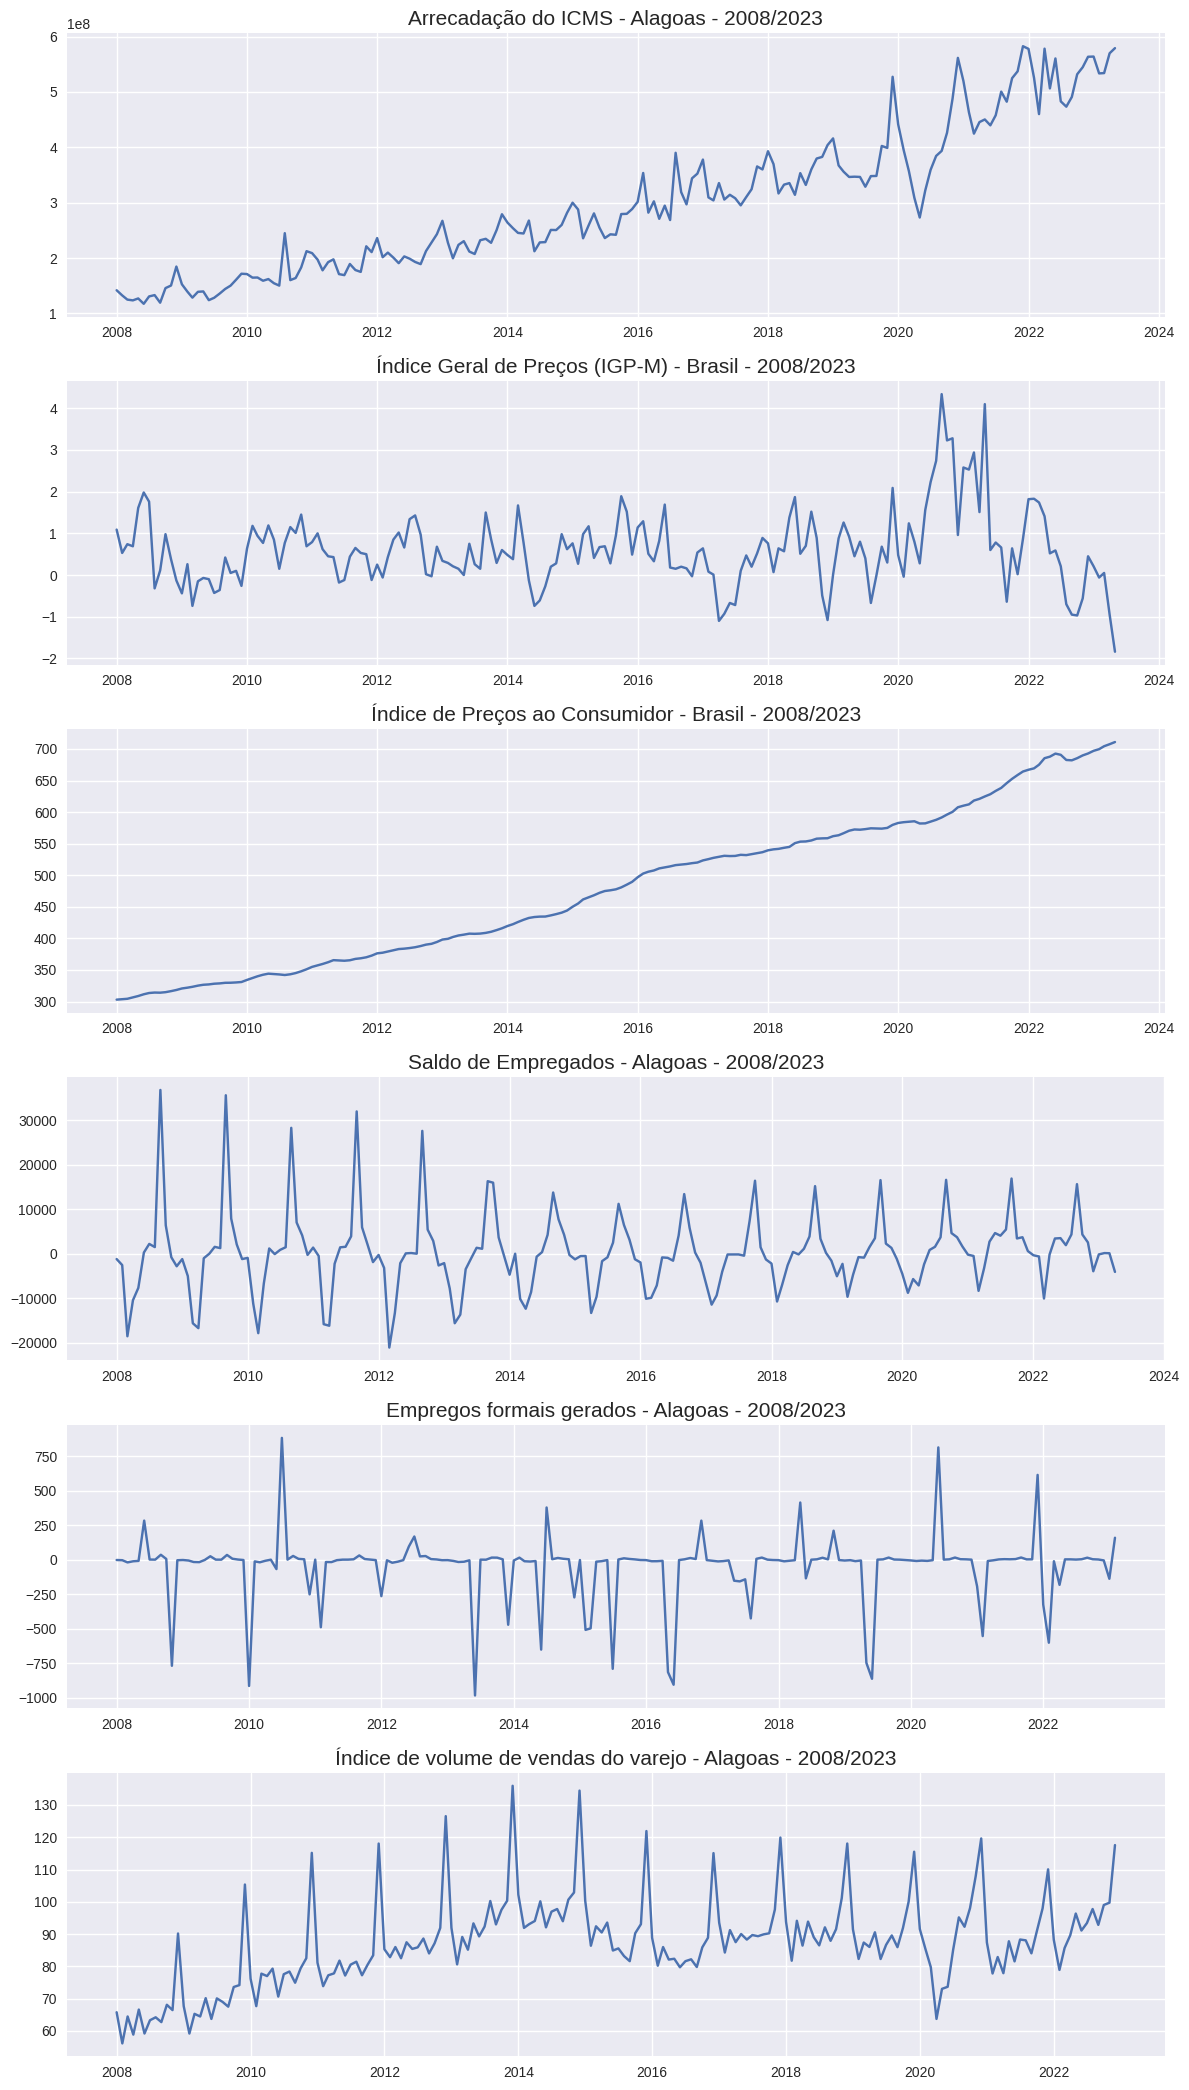

In [ ]:
plt.style.use('seaborn-v0_8')

plt.figure(figsize = (12, 21))

plt.subplot(611)
plt.plot(icms)
plt.title('Arrecadação do ICMS - Alagoas - 2008/2023', size = 15)

plt.subplot(612)
plt.plot(igpm)
plt.title('Índice Geral de Preços (IGP-M) - Brasil - 2008/2023', size = 15)

plt.subplot(613)
plt.plot(ipc)
plt.title('Índice de Preços ao Consumidor - Brasil - 2008/2023', size = 15)

plt.subplot(614)
plt.plot(saldo_emprego)
plt.title('Saldo de Empregados - Alagoas - 2008/2023', size = 15)

plt.subplot(615)
plt.plot(emprego)
plt.title('Empregos formais gerados - Alagoas - 2008/2023', size = 15)

plt.subplot(616)
plt.plot(vendas)
plt.title('Índice de volume de vendas do varejo - Alagoas - 2008/2023', size = 15)

plt.tight_layout()
plt.show()

In [ ]:
icms['IGP'] = igpm
icms['IPC'] = ipc
icms['SEmprego'] = saldo_emprego
icms['Emprego'] = emprego
icms['IVVV'] = vendas
icms

,ICMS,IGP,IPC,SEmprego,Emprego,IVVV
Data,,,,,,
2008-01-01,1.418120e+08,1.09,302.940,-1179.0,-1.179,65.75
2008-02-01,1.325520e+08,0.53,303.724,-2528.0,-2.528,56.09
2008-03-01,1.249120e+08,0.74,304.301,-18496.0,-18.496,64.43
2008-04-01,1.235330e+08,0.69,306.606,-10416.0,-10.416,58.82
2008-05-01,1.270107e+08,1.61,308.682,-7645.0,-7.645,66.57
...,...,...,...,...,...,...
2023-01-01,5.638099e+08,0.21,697.071,-137.0,-137.000,NaN
2023-02-01,5.334176e+08,-0.06,699.752,160.0,160.000,NaN
2023-03-01,5.339738e+08,0.05,704.378,127.0,NaN,NaN


Modelo 2, utilizando os dados mais condizentes com a série explicada:

In [ ]:
icms_m2['IPC'] = ipc
icms_m2['Emprego'] = saldo_emprego
icms_m2['IVVV'] = vendas
icms_m2

,ICMS,IPC,Emprego,IVVV
Data,,,,
2008-01-01,1.418120e+08,302.940,-1179.0,65.75
2008-02-01,1.325520e+08,303.724,-2528.0,56.09
2008-03-01,1.249120e+08,304.301,-18496.0,64.43
2008-04-01,1.235330e+08,306.606,-10416.0,58.82
2008-05-01,1.270107e+08,308.682,-7645.0,66.57
...,...,...,...,...
2023-01-01,5.638099e+08,697.071,-137.0,NaN
2023-02-01,5.334176e+08,699.752,160.0,NaN
2023-03-01,5.339738e+08,704.378,127.0,NaN


Analisando as bases de dados utilizadas para a análise, observamos que há mais observações de ICMS e IGP-M (conforme retornado na linha abaixo). Diante disso, utilizamos do código _.dropna(axis=0)_ para remover as linhas que não têm uma observação, nivelando as observações para uma análise efetiva.

In [ ]:
icms.isna().sum()

ICMS        0
IGP         0
IPC         0
SEmprego    1
Emprego     3
IVVV        5
dtype: int64

In [ ]:
icms=icms.dropna(axis=0)

In [ ]:
icms.isna().sum()

ICMS        0
IGP         0
IPC         0
SEmprego    0
Emprego     0
IVVV        0
dtype: int64

In [ ]:
icms

,ICMS,IGP,IPC,SEmprego,Emprego,IVVV
Data,,,,,,
2008-01-01,1.418120e+08,1.09,302.940,-1179.0,-1.179,65.75
2008-02-01,1.325520e+08,0.53,303.724,-2528.0,-2.528,56.09
2008-03-01,1.249120e+08,0.74,304.301,-18496.0,-18.496,64.43
2008-04-01,1.235330e+08,0.69,306.606,-10416.0,-10.416,58.82
2008-05-01,1.270107e+08,1.61,308.682,-7645.0,-7.645,66.57
...,...,...,...,...,...,...
2022-08-01,4.733253e+08,-0.70,682.608,4335.0,4.335,97.75
2022-09-01,4.908781e+08,-0.95,682.069,15625.0,15.625,92.83
2022-10-01,5.318116e+08,-0.97,685.446,4335.0,4.335,98.99


Ajustando a base do modelo 2:

In [ ]:
icms_m2.isna().sum()

ICMS       0
IPC        0
Emprego    1
IVVV       5
dtype: int64

In [ ]:
icms_m2 = icms_m2.dropna(axis=0)

In [ ]:
icms_m2.isna().sum()

ICMS       0
IPC        0
Emprego    0
IVVV       0
dtype: int64

In [ ]:
icms_m2

,ICMS,IPC,Emprego,IVVV
Data,,,,
2008-01-01,1.418120e+08,302.940,-1179.0,65.75
2008-02-01,1.325520e+08,303.724,-2528.0,56.09
2008-03-01,1.249120e+08,304.301,-18496.0,64.43
2008-04-01,1.235330e+08,306.606,-10416.0,58.82
2008-05-01,1.270107e+08,308.682,-7645.0,66.57
...,...,...,...,...
2022-08-01,4.733253e+08,682.608,4335.0,97.75
2022-09-01,4.908781e+08,682.069,15625.0,92.83
2022-10-01,5.318116e+08,685.446,4335.0,98.99


Gráfico paia, pois a escala das variáveis não permite observação efetiva.

Ver o vídeo de normalização de séries para observar os dados em mesma escala!!

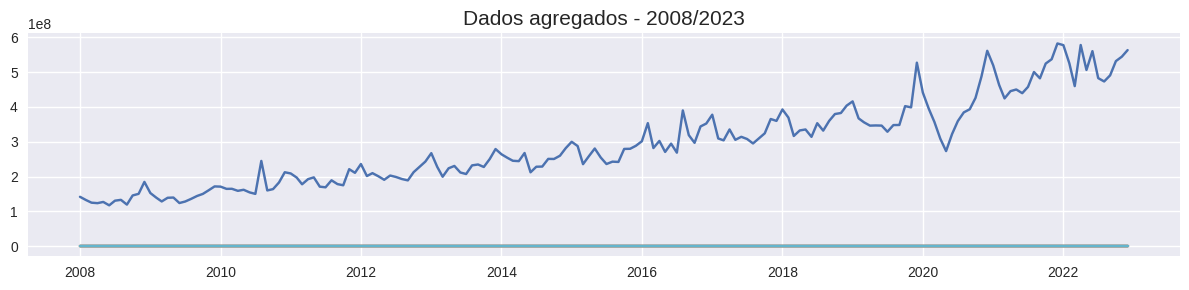

In [ ]:
plt.style.use('seaborn-v0_8')

plt.figure(figsize = (12, 3))

plt.plot(icms)
plt.title('Dados agregados - 2008/2023', size = 15)

plt.tight_layout()
plt.show()

In [ ]:
teste_norm = icms/icms.iloc[0]

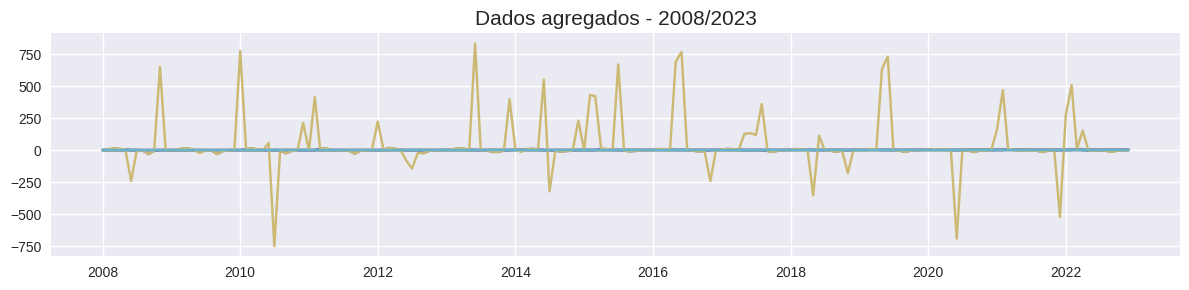

In [ ]:
plt.figure(figsize = (12, 3))

plt.plot(teste_norm)
plt.title('Dados agregados - 2008/2023', size = 15)

plt.tight_layout()
plt.show()

In [ ]:
plt.style.use('seaborn-v0_8')

plt.figure(figsize = (12, 3))

plt.plot(icms)
plt.title('Dados agregados - 2008/2023', size = 15)

plt.tight_layout()
plt.show()

In [ ]:
icms.astype(int)
icms.describe()

,ICMS,IGP,IPC,SEmprego,Emprego,IVVV
count,1.800000e+02,180.000000,180.000000,180.000000,180.000000,180.000000
mean,2.917554e+08,0.634167,474.020722,230.755556,-49.022678,87.252611
std,1.205116e+08,0.875854,114.417843,8755.493378,241.577887,13.923801
min,1.173065e+08,-1.100000,302.940000,-21032.000000,-982.000000,56.090000
25%,1.975071e+08,0.140000,368.218250,-2658.500000,-10.043000,79.755000
50%,2.719963e+08,0.535000,473.594500,-168.500000,-1.200000,87.230000
75%,3.599879e+08,0.972500,567.601500,3392.250000,4.162750,93.050000
max,5.825158e+08,4.340000,692.877000,36752.000000,883.000000,135.950000


<Axes: >

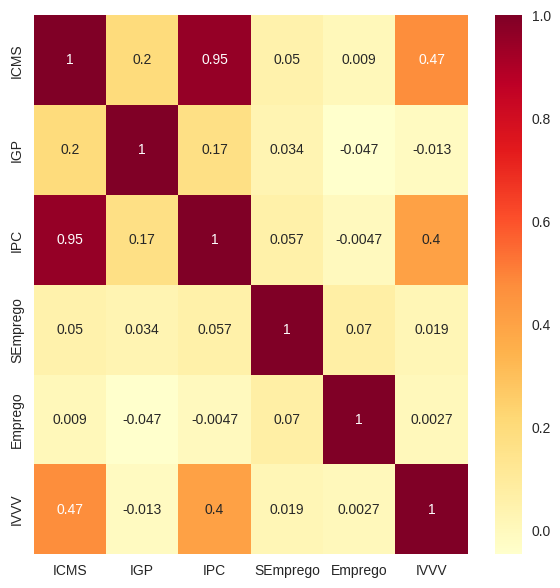

In [ ]:
%matplotlib inline
plt.figure(figsize=(7,7))
correlacao2 = icms.corr()
sns.heatmap(correlacao2, annot = True, cmap = "YlOrRd")

<Axes: >

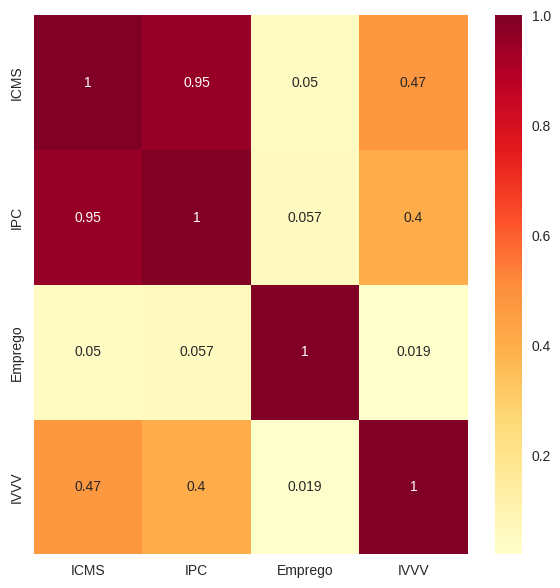

In [ ]:
%matplotlib inline
plt.figure(figsize=(7,7))
correlacao3 = icms_m2.corr()
sns.heatmap(correlacao3, annot = True, cmap = "YlOrRd")

In [ ]:
icms_m2

,ICMS,IGP,IPC,SEmprego,Emprego,IVVV
Data,,,,,,
2008-01-01,1.418120e+08,1.09,302.940,-1179.0,-1.179,65.75
2008-02-01,1.325520e+08,0.53,303.724,-2528.0,-2.528,56.09
2008-03-01,1.249120e+08,0.74,304.301,-18496.0,-18.496,64.43
2008-04-01,1.235330e+08,0.69,306.606,-10416.0,-10.416,58.82
2008-05-01,1.270107e+08,1.61,308.682,-7645.0,-7.645,66.57
...,...,...,...,...,...,...
2022-08-01,4.733253e+08,-0.70,682.608,4335.0,4.335,97.75
2022-09-01,4.908781e+08,-0.95,682.069,15625.0,15.625,92.83
2022-10-01,5.318116e+08,-0.97,685.446,4335.0,4.335,98.99


In [ ]:
testedw = smf.ols('ICMS ~ IGP + Emprego + IVVV', data=icms).fit()
dw = sm.stats.durbin_watson(testedw.resid)

print('Estatística do teste de Durbin-Watson:', dw)

Estatística do teste de Durbin-Watson: 0.3058331478820792


In [ ]:
testedw = smf.ols('ICMS ~ IPC + Emprego + IVVV', data=icms_m2).fit()
dw = sm.stats.durbin_watson(testedw.resid)

print('Estatística do teste de Durbin-Watson:', dw)

Estatística do teste de Durbin-Watson: 0.8992247691956071


O teste de Durbin-Watson resultará sempre em um valor entre 0 e 4. Quanto mais próximo de 0, maior evidência de correlação serial positiva; quanto mais próximo de 4, maior evidência de correlação serial negativa.

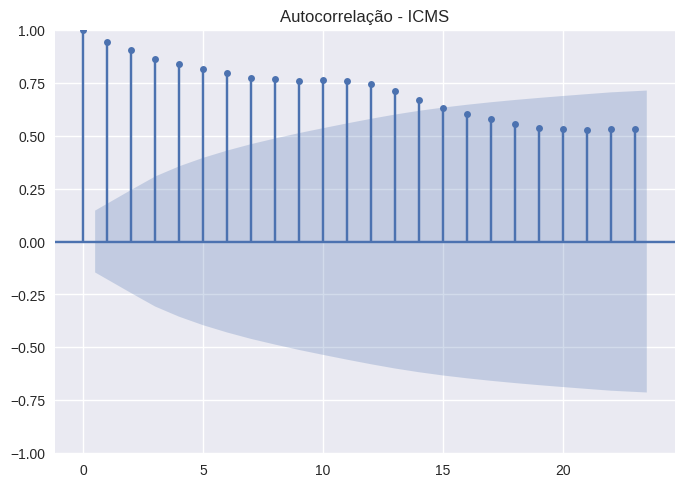

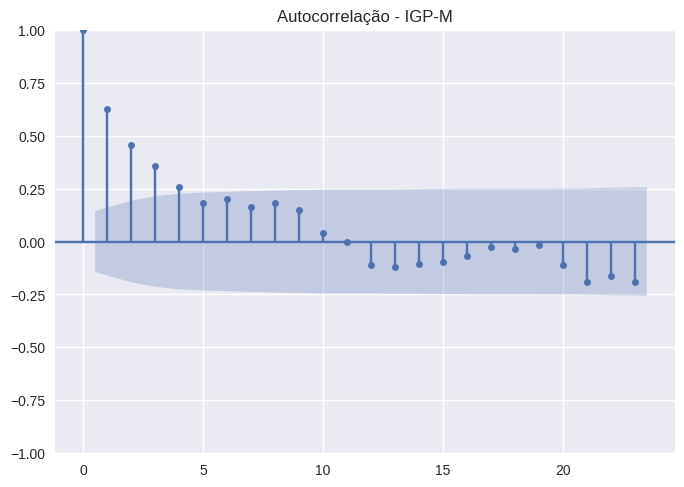

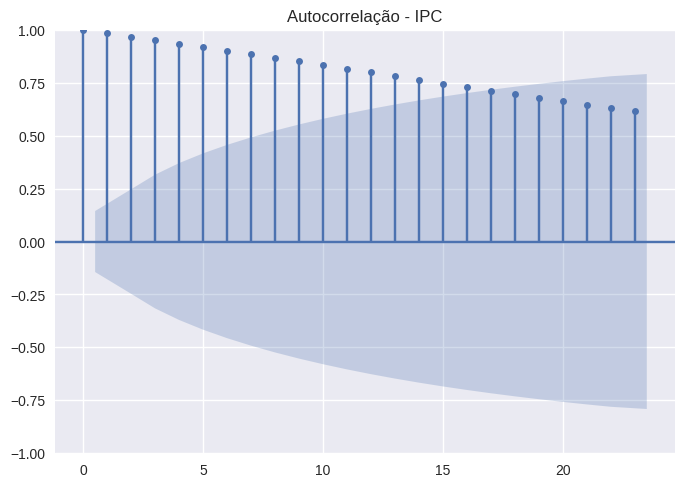

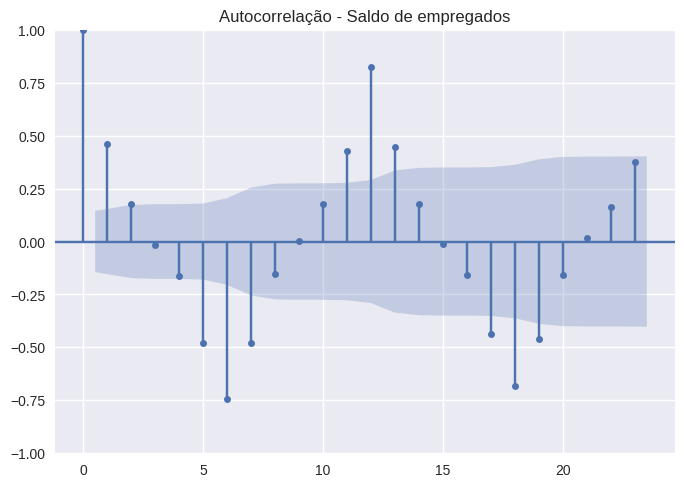

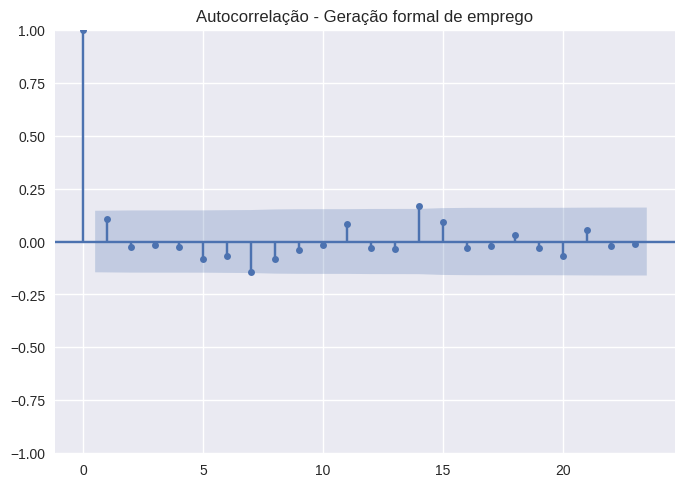

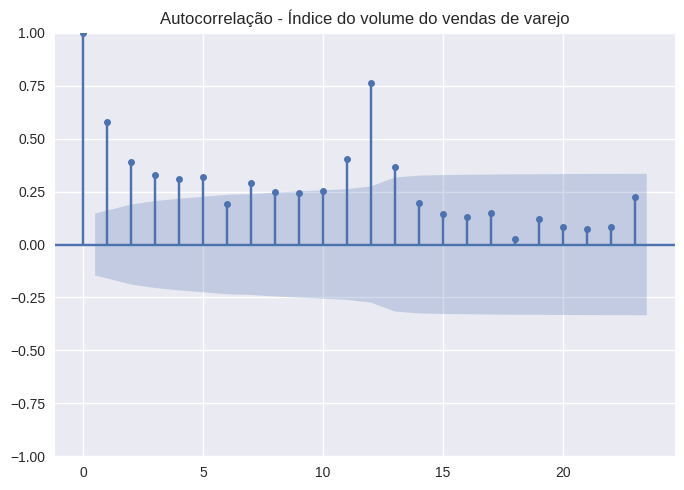

In [ ]:
plot_acf(icms['ICMS'],
         title = 'Autocorrelação - ICMS')

plot_acf(igpm,
         title = 'Autocorrelação - IGP-M')

plot_acf(ipc,
         title = 'Autocorrelação - IPC')

plot_acf(saldo_emprego,
         title = 'Autocorrelação - Saldo de empregados')

plot_acf(emprego,
         title = 'Autocorrelação - Geração formal de emprego')

plot_acf(vendas,
         title = 'Autocorrelação - Índice do volume do vendas de varejo')

plt.show()

In [ ]:
maxlag = 12
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):

  icms = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index = variables)
  for c in icms.columns:
    for r in icms.index:
      test_result = grangercausalitytests(data[[r, c]], maxlag = maxlag, verbose = False)
      p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
      if verbose: print(f'Y = {r}, X = {c}, P values = {p_values}')
      min_p_value = np.min(p_values)
      icms.loc[r, c] = min_p_value
  icms.columns = [var + '_x' for var in variables]
  icms.index = [var + '_y' for var in variables]
  return icms

grangers_causation_matrix(icms, variables = icms.columns)

,ICMS_x,IGP_x,IPC_x,SEmprego_x,Emprego_x,IVVV_x
ICMS_y,1.0000,0.0000,0.0000,0.0000,0.0003,0.0000
IGP_y,0.3231,1.0000,0.0686,0.6094,0.0962,0.5972
IPC_y,0.0002,0.0000,1.0000,0.0011,0.0083,0.0001
SEmprego_y,0.0015,0.0505,0.0097,1.0000,0.0523,0.0000
Emprego_y,0.5955,0.0414,0.1288,0.0174,1.0000,0.0032
IVVV_y,0.0000,0.1311,0.0016,0.0000,0.0303,1.0000


In [ ]:
maxlag = 12
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):

  icms_m2 = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index = variables)
  for c in icms_m2.columns:
    for r in icms_m2.index:
      test_result = grangercausalitytests(data[[r, c]], maxlag = maxlag, verbose = False)
      p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
      if verbose: print(f'Y = {r}, X = {c}, P values = {p_values}')
      min_p_value = np.min(p_values)
      icms_m2.loc[r, c] = min_p_value
  icms_m2.columns = [var + '_x' for var in variables]
  icms_m2.index = [var + '_y' for var in variables]
  return icms_m2

grangers_causation_matrix(icms_m2, variables = icms_m2.columns)

,ICMS_x,IPC_x,Emprego_x,IVVV_x
ICMS_y,1.0000,0.0000,0.0000,0.0000
IPC_y,0.0002,1.0000,0.0011,0.0001
Emprego_y,0.0015,0.0097,1.0000,0.0000
IVVV_y,0.0000,0.0016,0.0000,1.0000


**Teste de Dickey-Fuller, ou teste de raiz unitária:**

O teste é realizado para observar a presença de raiz unitária na série temporal, de forma a predizer o quão fortemente esta é afetada pela tendência.

Para interpretar o resultado do teste, precisamos inicialmente realizar um teste de hipótese com o p-valor para:
1. Aceitar (ou falhar em rejeitar) a Hipótese Nula (H0), sugerindo a presença de uma raiz unitária na série, e consequentemente sendo uma série não-estacionária;
2. Rejeitada a Hipótese Nula (H0), aceitamos a Hipótese Alternativa (H1) que sugere a não-presença de raiz unitária na série, indicando-a como série estacionária.

Para tal, observamos o p-valor e comparamos com o nível de significância esperado ao modelo. Desta forma:

3. Se o p-valor for maior que o nível de significância, aceitamos (ou falhamos em rejeitar) a hipótese nula (H0), e a série apresenta raiz unitária/é não-estacionária;
4. Se o p-valor for menor ou igual que o nível de significância, aceitamos a hipótese alternativa (H1), e a série não apresenta raiz unitária/é estacionária.

OU

3. _p-valor_  > 0.05 -> série não-estacionária;
4. _p-valor_ <= 0.05 -> série estacionária.

In [ ]:
# ADF ICMS

print('Estatística de Dickey-Fuller:', adfuller(icms['ICMS'])[0])
print('P-valor:', adfuller(icms['ICMS'])[1])
print('Defasagens usadas no teste:',adfuller(icms['ICMS'])[2])
print('Observações usadas:',adfuller(icms['ICMS'])[3])
print('Valores críticos:',adfuller(icms['ICMS'])[4])

Estatística de Dickey-Fuller: 1.2631721091574972
P-valor: 0.99639455910646
Defasagens usadas no teste: 13
Observações usadas: 166
Valores críticos: {'1%': -3.4703698981001665, '5%': -2.8791138497902193, '10%': -2.576139407751488}


In [ ]:
# ADF IGP

print('Estatística de Dickey-Fuller:', adfuller(icms['IGP'])[0])
print('P-valor:', adfuller(icms['IGP'])[1])
print('Defasagens usadas no teste:',adfuller(icms['IGP'])[2])
print('Observações usadas:',adfuller(icms['IGP'])[3])
print('Valores críticos:',adfuller(icms['IGP'])[4])

Estatística de Dickey-Fuller: -5.069875125840813
P-valor: 1.611200339559939e-05
Defasagens usadas no teste: 1
Observações usadas: 178
Valores críticos: {'1%': -3.467631519151906, '5%': -2.8779183721695567, '10%': -2.575501353364474}


In [ ]:
# ADF IPC

print('Estatística de Dickey-Fuller:', adfuller(icms['IPC'])[0])
print('P-valor:', adfuller(icms['IPC'])[1])
print('Defasagens usadas no teste:',adfuller(icms['IPC'])[2])
print('Observações usadas:',adfuller(icms['IPC'])[3])
print('Valores críticos:',adfuller(icms['IPC'])[4])

Estatística de Dickey-Fuller: 1.396035929733186
P-valor: 0.9970960591678157
Defasagens usadas no teste: 1
Observações usadas: 178
Valores críticos: {'1%': -3.467631519151906, '5%': -2.8779183721695567, '10%': -2.575501353364474}


In [ ]:
# ADF EMPREGO

print('Estatística de Dickey-Fuller:', adfuller(icms['Emprego'])[0])
print('P-valor:', adfuller(icms['Emprego'])[1])
print('Defasagens usadas no teste:',adfuller(icms['Emprego'])[2])
print('Observações usadas:',adfuller(icms['Emprego'])[3])
print('Valores críticos:',adfuller(icms['Emprego'])[4])

Estatística de Dickey-Fuller: -11.949488685936709
P-valor: 4.350710221970702e-22
Defasagens usadas no teste: 0
Observações usadas: 179
Valores críticos: {'1%': -3.4674201432469816, '5%': -2.877826051844538, '10%': -2.575452082332012}


In [ ]:
# ADF SEMPREGO

print('Estatística de Dickey-Fuller:', adfuller(icms['SEmprego'])[0])
print('P-valor:', adfuller(icms['SEmprego'])[1])
print('Defasagens usadas no teste:',adfuller(icms['SEmprego'])[2])
print('Observações usadas:',adfuller(icms['SEmprego'])[3])
print('Valores críticos:',adfuller(icms['SEmprego'])[4])

Estatística de Dickey-Fuller: -1.8327310891321924
P-valor: 0.3643369131602609
Defasagens usadas no teste: 11
Observações usadas: 168
Valores críticos: {'1%': -3.4698858990744115, '5%': -2.8789026251889647, '10%': -2.5760266680839004}


In [ ]:
# ADF IVVV

print('Estatística de Dickey-Fuller:', adfuller(icms['IVVV'], autolag = 'AIC')[0])
print('P-valor:', adfuller(icms['IVVV'], autolag = 'AIC')[1])
print('Defasagens usadas no teste:',adfuller(icms['IVVV'], autolag = 'AIC')[2])
print('Observações usadas:',adfuller(icms['IVVV'], autolag = 'AIC')[3])
print('Valores críticos:',adfuller(icms['IVVV'], autolag = 'AIC')[4])

Estatística de Dickey-Fuller: -2.5189475851144802
P-valor: 0.11093197183405451
Defasagens usadas no teste: 12
Observações usadas: 167
Valores críticos: {'1%': -3.470126426071447, '5%': -2.8790075987120027, '10%': -2.5760826967621644}


Conforme observado na análise gráfica e nos testes de Dickey-Fuller e de Durbin-Watson, algumas variáveis são não-estacionárias (ICMS e IVVV). Vamos testar as variáveis com o intuito de estacionarizá-las em primeira diferença:


ADF - ICMS
Estatística de Dickey-Fuller: -4.814603874222306
P-valor: 5.0993372061567486e-05
Defasagens usadas no teste: 12
Observações usadas: 166
Valores críticos: {'1%': -3.4703698981001665, '5%': -2.8791138497902193, '10%': -2.576139407751488}


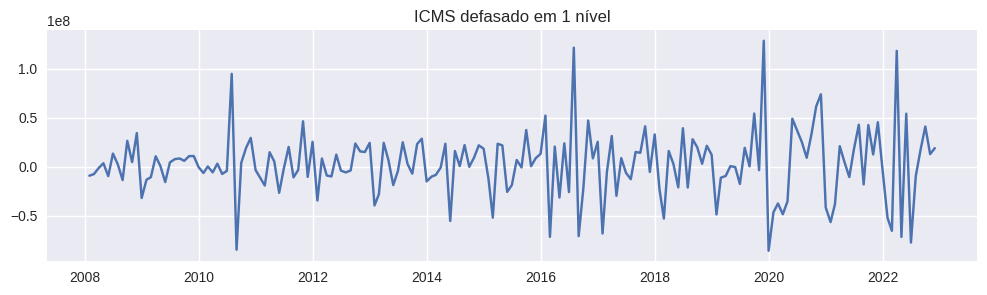

In [ ]:
icms_diff = diff(icms, k_diff=1)

plt.figure(figsize=(12,3))
plt.plot(icms_diff['ICMS'])
plt.title('ICMS defasado em 1 nível')

print('ADF - ICMS')
print('Estatística de Dickey-Fuller:', adfuller(icms_diff['ICMS'])[0])
print('P-valor:', adfuller(icms_diff['ICMS'])[1])
print('Defasagens usadas no teste:',adfuller(icms_diff['ICMS'])[2])
print('Observações usadas:',adfuller(icms_diff['ICMS'])[3])
print('Valores críticos:',adfuller(icms_diff['ICMS'])[4])

# A primeira diferença do ICMS o torna estacionário (falhamos em rejeitar a hipótese nula), em nível de significância de 1%.

ADF - Índice de Preços ao Consumidor
Estatística de Dickey-Fuller: -7.123323408456952
P-valor: 3.674220140976736e-10
Defasagens usadas no teste: 0
Observações usadas: 178
Valores críticos: {'1%': -3.467631519151906, '5%': -2.8779183721695567, '10%': -2.575501353364474}


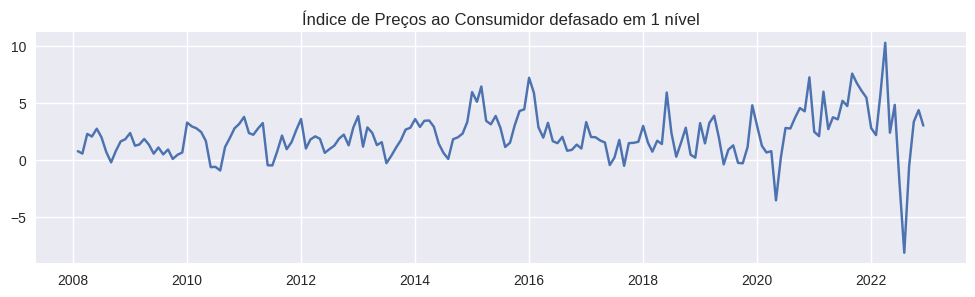

In [ ]:
plt.figure(figsize=(12,3))
plt.plot(icms_diff['IPC'])
plt.title('Índice de Preços ao Consumidor defasado em 1 nível')

print('ADF - Índice de Preços ao Consumidor')
print('Estatística de Dickey-Fuller:', adfuller(icms_diff['IPC'])[0])
print('P-valor:', adfuller(icms_diff['IPC'])[1])
print('Defasagens usadas no teste:',adfuller(icms_diff['IPC'])[2])
print('Observações usadas:',adfuller(icms_diff['IPC'])[3])
print('Valores críticos:',adfuller(icms_diff['IPC'])[4])

# A primeira diferença do IPC o torna estacionário (falhamos em rejeitar a hipótese nula), em nível de significância de 1%

ADF - Saldo de Empregados
Estatística de Dickey-Fuller: -22.09573787168366
P-valor: 0.0
Defasagens usadas no teste: 10
Observações usadas: 168
Valores críticos: {'1%': -3.4698858990744115, '5%': -2.8789026251889647, '10%': -2.5760266680839004}


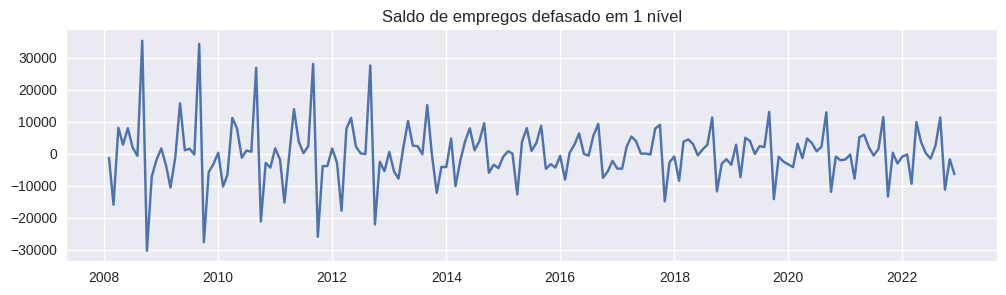

In [ ]:
plt.figure(figsize=(12,3))
plt.plot(icms_diff['SEmprego'])
plt.title('Saldo de empregos defasado em 1 nível')

print('ADF - Saldo de Empregados')
print('Estatística de Dickey-Fuller:', adfuller(icms_diff['SEmprego'])[0])
print('P-valor:', adfuller(icms_diff['SEmprego'])[1])
print('Defasagens usadas no teste:',adfuller(icms_diff['SEmprego'])[2])
print('Observações usadas:',adfuller(icms_diff['SEmprego'])[3])
print('Valores críticos:',adfuller(icms_diff['SEmprego'])[4])

# A primeira diferença do SEmprego o torna estacionário (falhamos em rejeitar a hipótese nula), em nível de significância de 1%

ADF - Índice do volume de vendas no varejo
Estatística de Dickey-Fuller: -3.794203279274995
P-valor: 0.0029671829712056503
Defasagens usadas no teste: 11
Observações usadas: 167
Valores críticos: {'1%': -3.470126426071447, '5%': -2.8790075987120027, '10%': -2.5760826967621644}


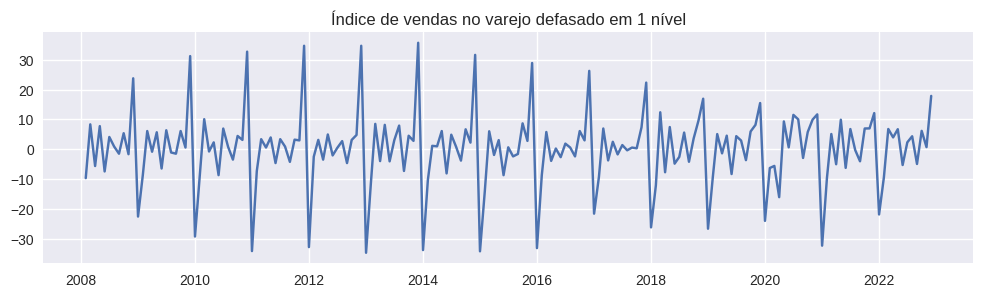

In [ ]:
plt.figure(figsize=(12,3))
plt.plot(icms_diff['IVVV'])
plt.title('Índice de vendas no varejo defasado em 1 nível')

print('ADF - Índice do volume de vendas no varejo')
print('Estatística de Dickey-Fuller:', adfuller(icms_diff['IVVV'])[0])
print('P-valor:', adfuller(icms_diff['IVVV'])[1])
print('Defasagens usadas no teste:',adfuller(icms_diff['IVVV'])[2])
print('Observações usadas:',adfuller(icms_diff['IVVV'])[3])
print('Valores críticos:',adfuller(icms_diff['IVVV'])[4])

# A primeira diferença do IVVV o torna estacionário (falhamos em rejeitar a hipótese nula), em nível de significância de 1%

Diante dos testes, observamos que o ICMS, o IPC, o Saldo de Empregados e o IVVV são estacionários em primeira ordem (I1), enquanto o IGP-M e Emprego são estacionários em ordem 0 (I0).

Logo, realizaremos um teste de cointegração para escolher qual modelo utilizaremos (VAR ou VECM):

In [ ]:
# Teste modelo 1 - Dados incorretos
def cointegration_test(icms, alpha = 0.05):
  """Perform Johanson's Cointegration Test and Report Summary"""
  out = coint_johansen(icms, 0, 1)
  d = {'0.90':0, '0.95':1, '0.99':2}
  traces = out.lr1
  cvts = out.cvt[:, d[str(1-alpha)]]
  def adjust(val, length = 6): return str(val).ljust(length)

  print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
  for col, trace, cvt in zip(icms.columns, traces, cvts):
    print(adjust(col), '::', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' => ' , trace > cvt)

cointegration_test(icms)

Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
ICMS   :: 141.39    > 47.8545   =>  True
IGP    :: 66.05     > 29.7961   =>  True
Emprego :: 26.1      > 15.4943   =>  True
IVVV   :: 0.62      > 3.8415    =>  False


In [ ]:
# Teste modelo 2 - Dados corretos
def cointegration_test(icms_m2, alpha = 0.05):
  """Perform Johanson's Cointegration Test and Report Summary"""
  out = coint_johansen(icms_m2, 0, 0)
  d = {'0.90':0, '0.95':1, '0.99':2}
  traces = out.lr1
  cvts = out.cvt[:, d[str(1-alpha)]]
  def adjust(val, length = 6): return str(val).ljust(length)

  print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
  for col, trace, cvt in zip(icms_m2.columns, traces, cvts):
    print(adjust(col), '::', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' => ' , trace > cvt)

cointegration_test(icms_m2)

Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
ICMS   :: 215.59    > 47.8545   =>  True
IPC    :: 120.11    > 29.7961   =>  True
Emprego :: 58.3      > 15.4943   =>  True
IVVV   :: 6.2       > 3.8415    =>  True


In [ ]:
print('O valor do Traço é :',coint_johansen(icms_m2,0,1).lr1[0])
print('Os valores crítico a 90%:',coint_johansen(icms_m2,0,1).cvt[0][0])
print('Os valores crítico a 95%:',coint_johansen(icms_m2,0,1).cvt[0][1])
print('Os valores crítico a 99%:',coint_johansen(icms_m2,0,1).cvt[0][2])

print(' ')

print('O valor do Maximum eigenvalue é :',coint_johansen(icms_m2,0,1).lr2[0])
print('Os valores crítico a 90%:',coint_johansen(icms_m2,0,1).cvm[0][0])
print('Os valores crítico a 95%:',coint_johansen(icms_m2,0,1).cvm[0][1])
print('Os valores crítico a 99%:',coint_johansen(icms_m2,0,1).cvm[0][2])

O valor do Traço é : 166.2282562240543
Os valores crítico a 90%: 44.4929
Os valores crítico a 95%: 47.8545
Os valores crítico a 99%: 54.6815
 
O valor do Maximum eigenvalue é : 80.05952188695143
Os valores crítico a 90%: 25.1236
Os valores crítico a 95%: 27.5858
Os valores crítico a 99%: 32.7172


Neste caso, o valor do traço foi maior que o valor crítico do teste, então  há cointegração entre as variáveis.

In [ ]:
dados = icms_m2[['ICMS', 'IPC', 'Emprego', 'IVVV']]

In [ ]:
import warnings
warnings.simplefilter("ignore")
lag_order = select_order(data = dados, maxlags = 13, deterministic = "ci", seasons = 0)
lag_order.summary()

,AIC,BIC,FPE,HQIC
0,58.27,58.72,2.021e+25,58.45
1,57.76,58.51,1.218e+25,58.07
2,57.28,58.33*,7.503e+24,57.70
3,57.10,58.45,6.336e+24,57.65
4,56.87,58.52,5.003e+24,57.54
5,56.63,58.58,3.983e+24,57.43
6,56.42,58.67,3.243e+24,57.34
7,56.46,59.01,3.386e+24,57.49
8,56.06,58.91,2.306e+24,57.22
9,55.89,59.04,1.961e+24,57.17


In [ ]:
print(select_coint_rank(dados, det_order = 0, k_ar_diff = 12, method = 'trace', signif = 0.05).summary())

Johansen cointegration test using trace test statistic with 5% significance level
r_0 r_1 test statistic critical value
-------------------------------------
  0   4          56.83          47.85
  1   4          29.95          29.80
  2   4          8.605          15.49
-------------------------------------


In [ ]:
print('O rank de cointegração usado no modelo VECM é: ', select_coint_rank(dados, det_order = 0, k_ar_diff = 12, method = 'trace', signif = 0.05).rank)

O rank de cointegração usado no modelo VECM é:  2


In [ ]:
modelo = VECM(dados, deterministic = 'ci', k_ar_diff = 12, coint_rank = 2)

In [ ]:
VEC = modelo.fit()

In [ ]:
VEC.summary()

,coef,std err,z,P>|z|,[0.025,0.975]
L1.ICMS,-0.1504,0.205,-0.734,0.463,-0.552,0.251
L1.IPC,3.618e+06,1.17e+06,3.084,0.002,1.32e+06,5.92e+06
L1.Emprego,-6395.4361,3197.579,-2.000,0.045,-1.27e+04,-128.296
L1.IVVV,2.221e+06,4.36e+05,5.089,0.000,1.37e+06,3.08e+06
L2.ICMS,-0.0447,0.190,-0.235,0.814,-0.417,0.328
L2.IPC,-6.43e+05,1.33e+06,-0.484,0.629,-3.25e+06,1.96e+06
L2.Emprego,-5483.7659,2978.419,-1.841,0.066,-1.13e+04,353.829
L2.IVVV,2.746e+06,5e+05,5.493,0.000,1.77e+06,3.73e+06
L3.ICMS,-0.1795,0.176,-1.021,0.307,-0.524,0.165
L3.IPC,2.489e+06,1.34e+06,1.850,0.064,-1.47e+05,5.12e+06


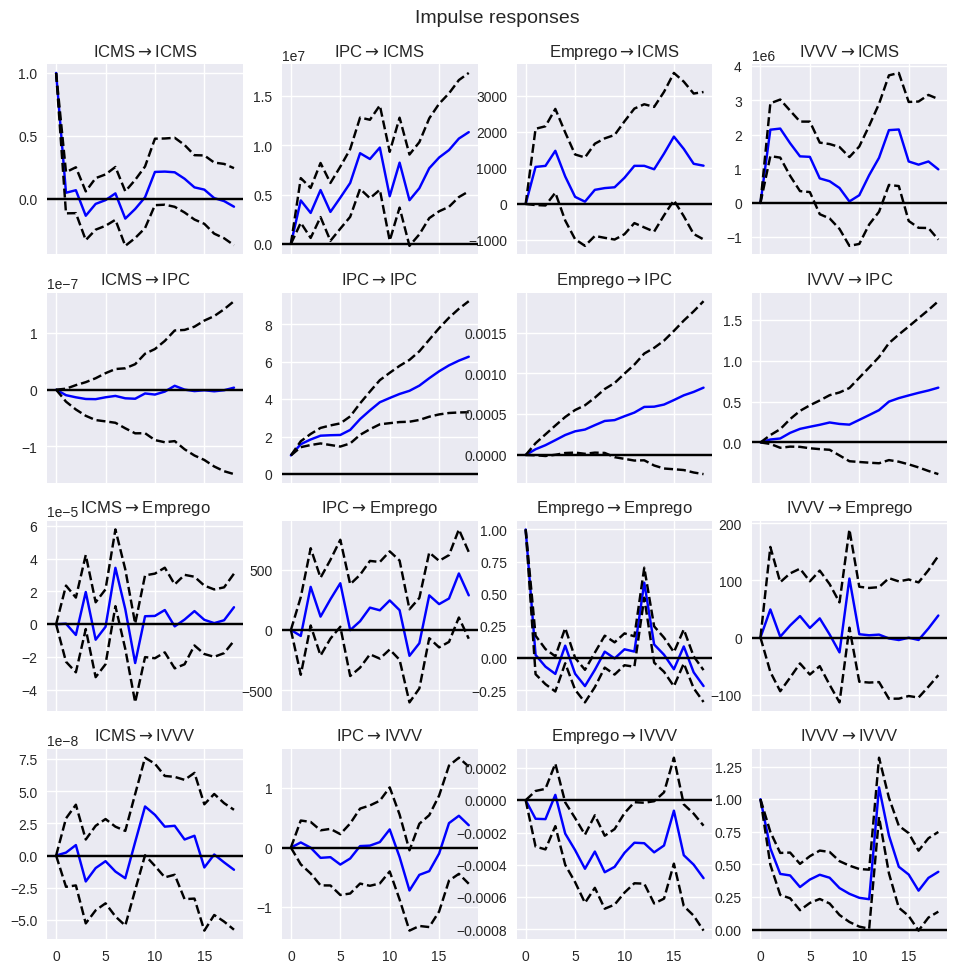

In [ ]:
ir = VEC.irf(periods = 18)
ir.plot(plot_stderr=True);

In [ ]:
display(VEC.test_granger_causality('ICMS', causing='ICMS', signif=0.05).summary())
display(VEC.test_granger_causality('ICMS', causing='IPC', signif=0.05).summary())
display(VEC.test_granger_causality('ICMS', causing='Emprego', signif=0.05).summary())
display(VEC.test_granger_causality('ICMS', causing='IVVV', signif=0.05).summary())

Test statistic,Critical value,p-value,df
0.8605,1.743,0.595,"(13, 436)"


Test statistic,Critical value,p-value,df
4.399,1.743,0.000,"(13, 436)"


Test statistic,Critical value,p-value,df
1.592,1.743,0.084,"(13, 436)"


Test statistic,Critical value,p-value,df
3.682,1.743,0.000,"(13, 436)"


In [ ]:
display(VEC.test_granger_causality('IPC', causing='ICMS', signif=0.05).summary())
display(VEC.test_granger_causality('IPC', causing='IPC', signif=0.05).summary())
display(VEC.test_granger_causality('IPC', causing='Emprego', signif=0.05).summary())
display(VEC.test_granger_causality('IPC', causing='IVVV', signif=0.05).summary())

Test statistic,Critical value,p-value,df
1.664,1.743,0.066,"(13, 436)"


Test statistic,Critical value,p-value,df
221.2,1.743,0.000,"(13, 436)"


Test statistic,Critical value,p-value,df
1.606,1.743,0.080,"(13, 436)"


Test statistic,Critical value,p-value,df
1.970,1.743,0.022,"(13, 436)"


In [ ]:
display(VEC.test_granger_causality('Emprego', causing='ICMS', signif=0.05).summary())
display(VEC.test_granger_causality('Emprego', causing='IPC', signif=0.05).summary())
display(VEC.test_granger_causality('Emprego', causing='Emprego', signif=0.05).summary())
display(VEC.test_granger_causality('Emprego', causing='IVVV', signif=0.05).summary())

Test statistic,Critical value,p-value,df
2.128,1.743,0.012,"(13, 436)"


Test statistic,Critical value,p-value,df
2.267,1.743,0.007,"(13, 436)"


Test statistic,Critical value,p-value,df
20.36,1.743,0.000,"(13, 436)"


Test statistic,Critical value,p-value,df
3.127,1.743,0.000,"(13, 436)"


In [ ]:
display(VEC.test_granger_causality('IVVV', causing='ICMS', signif=0.05).summary())
display(VEC.test_granger_causality('IVVV', causing='IPC', signif=0.05).summary())
display(VEC.test_granger_causality('IVVV', causing='Emprego', signif=0.05).summary())
display(VEC.test_granger_causality('IVVV', causing='IVVV', signif=0.05).summary())

Test statistic,Critical value,p-value,df
2.814,1.743,0.001,"(13, 436)"


Test statistic,Critical value,p-value,df
1.912,1.743,0.027,"(13, 436)"


Test statistic,Critical value,p-value,df
2.563,1.743,0.002,"(13, 436)"


Test statistic,Critical value,p-value,df
48.44,1.743,0.000,"(13, 436)"


In [ ]:
display(VEC.test_inst_causality(causing = 'ICMS').summary())
display(VEC.test_inst_causality(causing = 'IPC').summary())
display(VEC.test_inst_causality(causing = 'Emprego').summary())
display(VEC.test_inst_causality(causing = 'IVVV').summary())

Test statistic,Critical value,p-value,df
24.27,7.815,0.000,3


Test statistic,Critical value,p-value,df
18.69,7.815,0.000,3


Test statistic,Critical value,p-value,df
6.237,7.815,0.101,3


Test statistic,Critical value,p-value,df
13.73,7.815,0.003,3


In [ ]:
for col, val in zip(dados.columns, durbin_watson(VEC.resid)):
  print((col), ':', round(val, 6))

ICMS : 1.994612
IPC : 1.956075
Emprego : 2.07494
IVVV : 1.826375


In [ ]:
white_test = VEC.test_whiteness(nlags = 13, adjusted = True)
white_test.summary()

Test statistic,Critical value,p-value,df
113.9,15.51,0.000,8


In [ ]:
VEC.test_normality().summary()

Test statistic,Critical value,p-value,df
170.3,15.51,0.000,8


In [ ]:
residuals = pd.DataFrame(VEC.resid, columns = ['ICMS_resid', 'IPC_resid', 'Emprego_resid', 'IVVV_resid'])

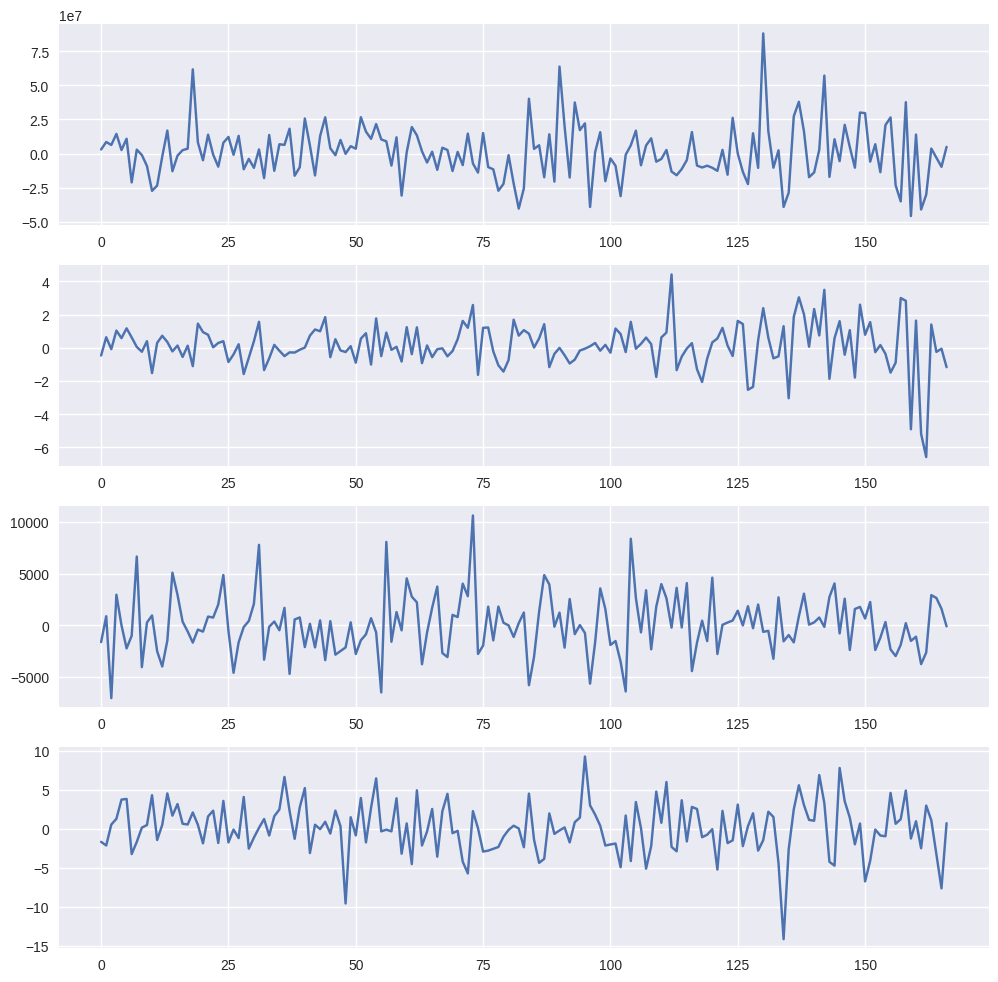

In [ ]:
plt.figure(figsize = (12,12))

plt.subplot(411)
plt.plot(residuals['ICMS_resid'])

plt.subplot(412)
plt.plot(residuals['IPC_resid'])

plt.subplot(413)
plt.plot(residuals['Emprego_resid'])

plt.subplot(414)
plt.plot(residuals['IVVV_resid'])

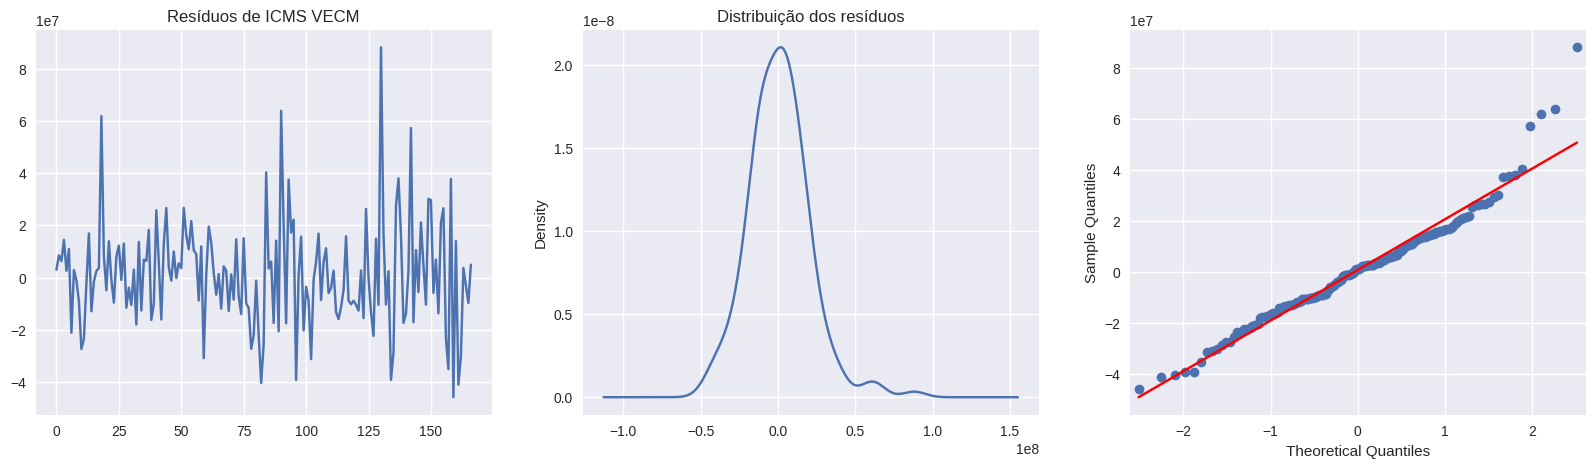

In [ ]:
fig, ax = plt.subplots(1,3,figsize=(20,5))
residuals['ICMS_resid'].plot(title="Resíduos de ICMS VECM", ax=ax[0])
residuals['ICMS_resid'].plot(kind='kde', title='Distribuição dos resíduos', ax=ax[1])
qqplot(residuals['ICMS_resid'],line='s', ax=ax[2]);

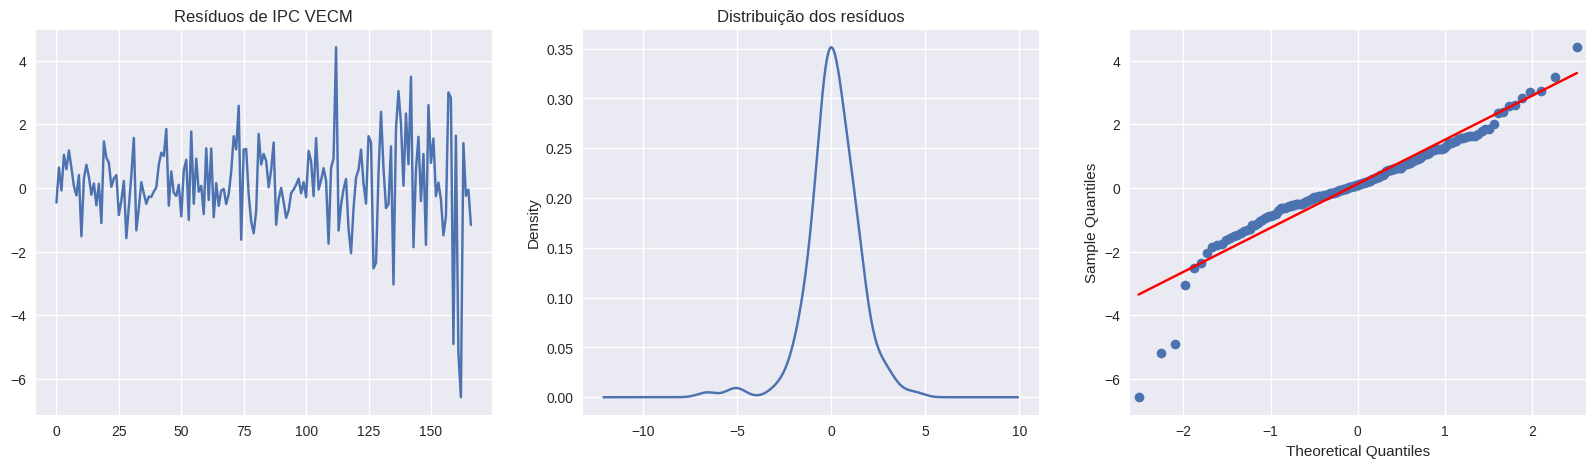

In [ ]:
fig, ax = plt.subplots(1,3,figsize=(20,5))
residuals['IPC_resid'].plot(title="Resíduos de IPC VECM", ax=ax[0])
residuals['IPC_resid'].plot(kind='kde', title='Distribuição dos resíduos', ax=ax[1])
qqplot(residuals['IPC_resid'],line='s', ax=ax[2]);

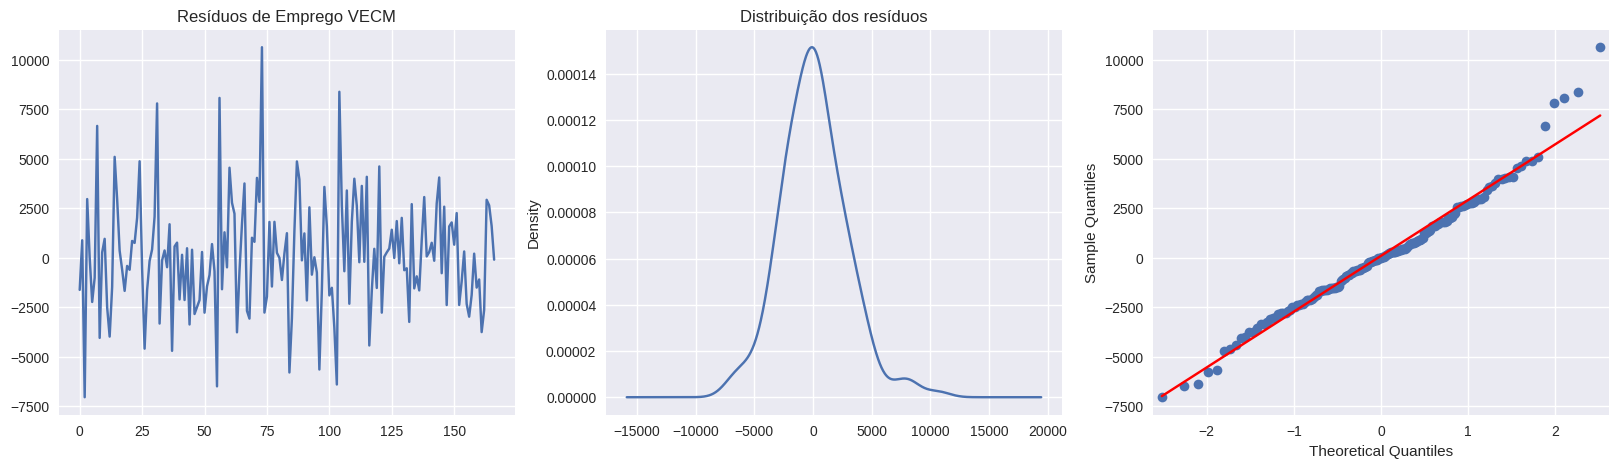

In [ ]:
fig, ax = plt.subplots(1,3,figsize=(20,5))
residuals['Emprego_resid'].plot(title="Resíduos de Emprego VECM", ax=ax[0])
residuals['Emprego_resid'].plot(kind='kde', title='Distribuição dos resíduos', ax=ax[1])
qqplot(residuals['Emprego_resid'],line='s', ax=ax[2]);

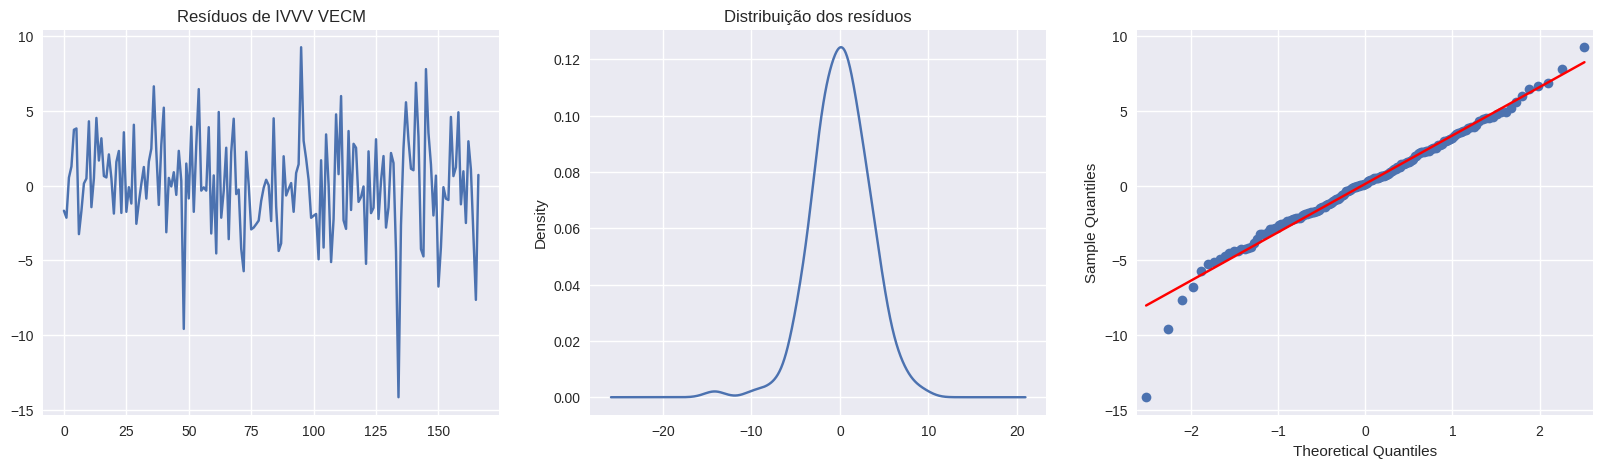

In [ ]:
fig, ax = plt.subplots(1,3,figsize=(20,5))
residuals['IVVV_resid'].plot(title="Resíduos de IVVV VECM", ax=ax[0])
residuals['IVVV_resid'].plot(kind='kde', title='Distribuição dos resíduos', ax=ax[1])
qqplot(residuals['IVVV_resid'],line='s', ax=ax[2]);